In [1]:
"""
Focusing on things that were not done in v1.
"""


'\nFocusing on things that were not done in v1.\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

from neuralmonkey.classes.session import load_mult_session_helper
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

In [6]:
# load all sessions for Pancho on 221020
animal = "Pancho"
date = 221031

MS = load_mult_session_helper(date, animal)

TODO: Pancho -- combine circles with the tohers
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Pancho*/*221031*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/221031/Pancho-221031-150426
session:  0
Beh Sessions that exist on this date:  {221031: [(1, 'dirshapecolor1h')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['dirshapecolor1h']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Pancho*/*221031*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/221031/Pancho-221031-150426
{'filename_components_hyphened': ['Pancho', '221031', '150426'], 'basedirs': ['/home/lucas/mnt/Freiwald/ltian/recordings/Pancho', '/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/221031'], 'basedirs_filenames': ['221031', 'Pancho-221031-150426'], 'filename_final_ext': 'Pancho-221031-150426

### Saving local cached data

In [7]:
MS.print_summary_sessions()

=== N trials per session
sess 0 872
=== N units per session

====== SESSION NUM:  0
M1_m  :  25
M1_l  :  26
PMv_l  :  30
PMv_m  :  30
PMd_p  :  26
PMd_a  :  30
dlPFC_p  :  31
dlPFC_a  :  31
vlPFC_p  :  31
vlPFC_a  :  26
FP_p  :  28
FP_a  :  29
SMA_p  :  31
SMA_a  :  28
preSMA_p  :  30
preSMA_a  :  29
 ------- 
TOTAL:  461
MIN:  25
MAX:  31
MEAN:  28.8125
--------
BAD SITES (n sites)
sites_garbage 21
sites_low_fr 31
sites_low_spk_magn 30
Total (accounting for overlap):  51
------
Summary for each overall region
region, nunits, --, min(sitenum), max(sitenum)
M1_m 25 ---- 1 32
M1_l 26 ---- 33 64
PMv_l 30 ---- 65 96
PMv_m 30 ---- 97 128
PMd_p 26 ---- 129 159
PMd_a 30 ---- 161 192
dlPFC_p 31 ---- 193 224
dlPFC_a 31 ---- 225 256
vlPFC_p 31 ---- 258 288
vlPFC_a 26 ---- 290 320
FP_p 28 ---- 321 352
FP_a 29 ---- 353 384
SMA_p 31 ---- 385 416
SMA_a 28 ---- 417 447
preSMA_p 30 ---- 449 480
preSMA_a 29 ---- 481 512


In [ ]:
sn = MS.SessionsList[0]
sn._MapperTrialcode2TrialToTrial

In [11]:
for sn in MS.SessionsList:
    sn._savelocalcached_save(save_dataset_beh=False, save_datslices=False, ONLY_EXTRA_STUFF=True)

In [ ]:
MS.print_summary_sessions()

In [ ]:
sn = MS.SessionsList[0]

In [ ]:
# get a summary of e.g. units per brain region
MS.print_summary_sessions()

In [ ]:
# get session 1
sn = MS.SessionsList[1]

In [ ]:
# from this session, get list of sites (just a list of numbers)
sites = sn.sitegetterKS_all_sites()


In [ ]:
# get all sites for a given brain region (list of numbers that ranges from 1:512)
sn.sitegetterKS_map_region_to_sites("FP_a")

In [ ]:
# get list of good (i.e. attempted) trials in this session (just a list of numbers)
trials = sn.get_trials_list(True) #only_if_ml2_fixation_success=True


In [ ]:
import pandas as pd

pd.DataFrame()

In [ ]:
# get spiketimes and other metadat for a given [SITE, CHANNEL]
site = sn.sitegetterKS_all_sites()[0]
trial = sn.get_trials_list()[0]
sn.datall_TDT_KS_slice_single_bysite(site, trial)

### Plot rasters

In [ ]:
sites = sn.sitegetterKS_map_region_to_sites("FP")
sites[:10]

In [ ]:
# plot mult
# iple trials for a given site
trials = sn.get_trials_list()
# sn.plotwrapper_raster_multrials_onesite(trials[:20], site);
sn.plotwrapper_raster_multrials_onesite(trials[:20], sites[8], plot_beh=False, alignto="samp");

In [ ]:
# plot multiple trials for a given site, and align to a task event (e.g. go, doneb)
sn.plotwrapper_raster_multrials_onesite(trials[80: 100], 298, alignto="go");

In [ ]:
# plot one trial for MULTIPLE sites (also makes plots for photodiodes, eyetracking etc.)
sites = sn.sitegetterKS_map_region_to_sites("vlPFC")
sn.plotwrapper_raster_oneetrial_multsites(trial,sites)

### Other plots (more low-level comapred to above)

In [ ]:
# x-coordinate of eye, but in terms of voltage not screen
# (will have to scale/rotate to get screen coordinates)
times_x, vals_x, fs_x = sn.extract_data_tank_streams("eyex", 5, ploton=True)

In [ ]:
#%matplotlib notebook
times_y, vals_y, fs_y = sn.extract_data_tank_streams("eyey", 110, ploton=True)

In [ ]:
# EYE VISUALIZATION 1: dots
plt.figure()
plt.scatter(vals_x, vals_y)

In [ ]:
# EYE VISUALIZATION 2: heatmap (hex)
plt.figure()
plt.hexbin(vals_x, vals_y,cmap="cividis")

In [ ]:
# EYE VISUALIZATION 3: heatmap (hist2d)
plt.figure()
plt.hist2d(vals_x,vals_y,bins=40);

In [ ]:
# ???
fig, ax = plt.subplots(1,1)
sn.plotwrapper_smoothed_multtrials_multsites_timewindow(sites[:1], trials[:20], ax=ax)

In [ ]:
# aligning neural trial # to behavior trial # (as there is usually an offset)
t = trials[90]
idx = sn.datasetbeh_trial_to_datidx(t)
print(t, idx)
sn.Datasetbeh.Dat.iloc[idx]

In [ ]:
# --- make histogram of diffs, is it bimodal? (if so, split as saccades/fixations, otherwise )
d = np.diff(vals_x); 
d = d[np.abs(d) < 1];
t = np.arange(len(d));
plt.figure()
plt.plot(t,d)
#d2 = np.diff(d)
#d2_clean = d2[np.abs(d2) < 1]
#plt.hist(d2_clean,bins=100,log=True);

In [ ]:
##func(ax, eye_x_values, eye_y_values) --> ax (with drawing on top).
#import matplotlib.pyplot as plt
#fig, axes = plt.subplots(2,2)
#ax = axes.flatten()[3]
#ax.plot(1,1,'ok')

In [ ]:
# get affine-transformed data (e.g. relative to screen)
x_aff = sn.beh_extract_eye_good(113)[1][:,0]
y_aff = sn.beh_extract_eye_good(113)[1][:,1]

# SMOOTH DATA
from pythonlib.pythonlib.tools.timeseriestools import smoothDat
x_aff_sm = smoothDat(x_aff, window_len=10)
y_aff_sm = smoothDat(y_aff, window_len=10)

In [ ]:
strk = sn.strokes_extract(113)

# get time of first element in each array, for "stroke onset", and then subsample data for eyetracking on this
onset = strk[0][0,2]
offset = strk[-1][-1,2]

In [ ]:
times = sn.beh_extract_eye_good(113)[0]
inds = (times>onset) & (times<offset)

plt.figure()
plt.scatter(x_aff_sm[inds], y_aff_sm[inds],c=range(sum(inds)))

In [ ]:
# yarbus
plt.figure()
plt.scatter(x_aff_sm, y_aff_sm,c=range(len(x_aff_sm)))

In [ ]:
fig, ax = plt.subplots(1,1)
sn.plot_final_drawing(ax, 113)

In [ ]:
# heatmap
plt.figure()
plt.hist2d(x_aff_sm,y_aff_sm,bins=100);

In [ ]:
# x-plot
plt.figure()
times = range(0,len(x_aff_sm))
plt.plot(times,x_aff_sm)

In [ ]:
# y-plot
plt.figure()
plt.plot(times,y_aff_sm)

### Snippets

Collects data aligned to instances of a given event. Can then use the Snippets methods to do many things, plotting, analysis, etc.

In [8]:
from neuralmonkey.classes.snippets import Snippets, extraction_helper


In [11]:
# Pick out a single session
sn = MS.SessionsList[0]


In [12]:
# Turn on debug mode, this prunes sites and trials, so below runs faster
DEBUG = True
sn._DEBUG_PRUNE_SITES = DEBUG
sn._DEBUG_PRUNE_TRIALS = DEBUG


In [86]:
# Turn off
DEBUG = False
sn._DEBUG_PRUNE_SITES = DEBUG
sn._DEBUG_PRUNE_TRIALS = DEBUG


In [ ]:
# ****** FOR KEDAR: you would want to modify list_events to something like this:
list_events = ["saccon", "saccoff"]


In [85]:
# This is best, genreeates snippest for each session, thne concats into a single SP
from neuralmonkey.classes.snippets import load_and_concat_mult_snippets
which_level = "trial"
PRE_DUR = -0.2
POST_DUR = 0.4
# EVENTS_KEEP = ["03_samp", "06_on_strokeidx_0"]
EVENTS_KEEP = ["samp", "post", "reward_all"]
DEBUG = False
SP, _ = load_and_concat_mult_snippets(MS, which_level, EVENTS_KEEP, DEBUG = DEBUG, 
                                      prune_low_fr_sites=False, 
                                      REGENERATE_SNIPPETS=True, 
                                      PRE_DUR=PRE_DUR, POST_DUR=POST_DUR)


** NOT SKIPPING EXTRACTION, since was not able to load snippets, for: 
(animal, DATE, which_level, session)
Pancho 221031 trial 0
Starting length of D.Dat: 872
--BEFORE REMOVE; existing supervision_stage_concise:
supervision_stage_concise
off|1|solid|1001|0     623
mask|1|solid|1001|0    249
Name: count, dtype: int64
############ NOT PRUNING SUPERVISION TRIALS
Dataset final len: 872
*** RUNNING D.preprocessGood using these params:
['sanity_gridloc_identical']
-- Len of D, before applying this param: sanity_gridloc_identical, ... 872
Success! all gridloc identical!
These are the x and y mappings, gridloc:loc
x... {-1: -1.7, 0: 0.05, 1: 1.8}
y... {0: 0.05}
after: 872
Kept these events:  ['samp', 'post', 'reward_all']

 == extarcating these sites:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 21, 22, 24, 27, 28, 29, 30, 31, 32, 33, 37, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 

KeyboardInterrupt: 

In [ ]:
# [OPTIONAL] Clean up, applying expt specific params and extract features
# NOTE: Only do this if you want to clean up data -- e.g, only successful trials.

from neuralmonkey.analyses.rsa import rsagood_questions_dict, rsagood_questions_params
question = "RULESW_BASE_trial"
q_params = rsagood_questions_dict(animal, date, question)[question]

D, list_features_extraction = SP.datasetbeh_preprocess_clean_by_expt(
    ANALY_VER=q_params["ANALY_VER"], vars_extract_append=q_params["effect_vars"],
    substrokes_plot_preprocess=False)


In [ ]:
# Inspect the data. 
# Each row represents a single combination of:
# (trial, chan, event). To see that, inspect the output of 

display(SP.DfScalar)

from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(SP.DfScalar, ["trialcode", "chan", "event_aligned"])


##### Plotting functions for Snippets

In [13]:
SP.Sites

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 21,
 22,
 24,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 37,
 39,
 40,
 41,
 42,
 43,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 146,
 147,
 148,
 149,
 150,
 153,
 155,
 156,
 157,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 

In [15]:
chan = 437
SP.plotgood_rasters(chan)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_251981/894037065.py", line 2, in <module>
    SP.plotgood_rasters(chan)
  File "/home/lucas/code/neuralmonkey/neuralmonkey/classes/snippets.py", line 6280, in plotgood_rasters
    fig, ax = self._plotgood_rasters(dfthis, xmin=None, xmax=None, ax=ax)
  File "/home/lucas/code/neuralmonkey/neuralmonkey/classes/snippets.py", line 5953, in _plotgood_rasters
    assert False, "doesnt work, since plotmod_overlay_trial_events_mult assumes a single session"
AssertionError: doesnt work, since plotmod_overlay_trial_events_mult assumes a single session

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/IPython/core/interactive

In [ ]:
site =2
event=None


fig, axesall = plt.subplots(1,2)

# 1) Plot the rasters ont he top row.
# axes = axesall[0]
ax = axesall.flatten()[0]
SP.plotgood_rasters(site, event, ax)    

# SP.plotgood_rasters(chan)

In [ ]:
SP.plotgood_rasters_smfr_combined(chan)

In [16]:
SP.datasetbeh_append_column("epoch")

Snippets -- extracting beh dataset for first time! (concatting and tokens preprocess)
Generated index mappers!
Updating this column of self.DfScalar with Dataset beh:
epoch


(<Figure size 660x2000 with 2 Axes>,
 array([[<Axes: title={'center': "('dummy',)"}, ylabel="('dummy',)">],
        [<Axes: title={'center': "('dummy',)"}>]], dtype=object))

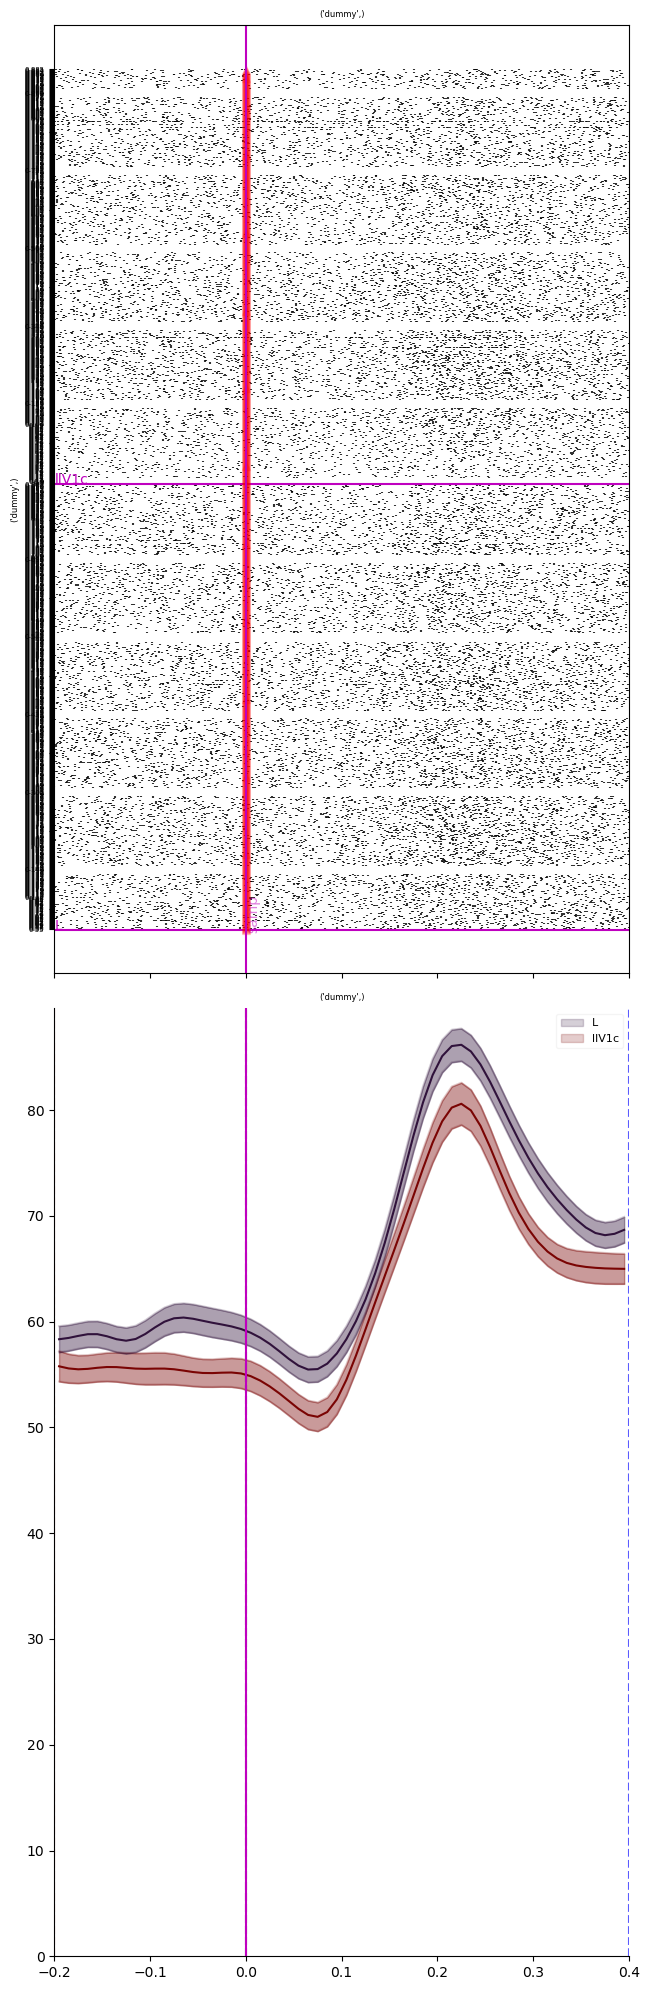

In [43]:
# Rasters and smoothed FR, split by event
chan = SP.Sites[4]
chan = 97
event = "03_samp"
SP.plotgood_rasters_smfr_each_level_combined(chan, var="epoch", event=event, OVERWRITE_n_min=1)

Updating this column of self.DfScalar with Dataset beh:
epoch
Updating this column of self.DfScalar with Dataset beh:
seqc_0_shape


(<Figure size 1294.92x1962 with 4 Axes>,
 array([[<Axes: title={'center': "('L',)"}, ylabel="('L',)">,
         <Axes: title={'center': "('llV1c',)"}, ylabel="('llV1c',)">],
        [<Axes: title={'center': "('L',)"}>,
         <Axes: title={'center': "('llV1c',)"}>]], dtype=object))

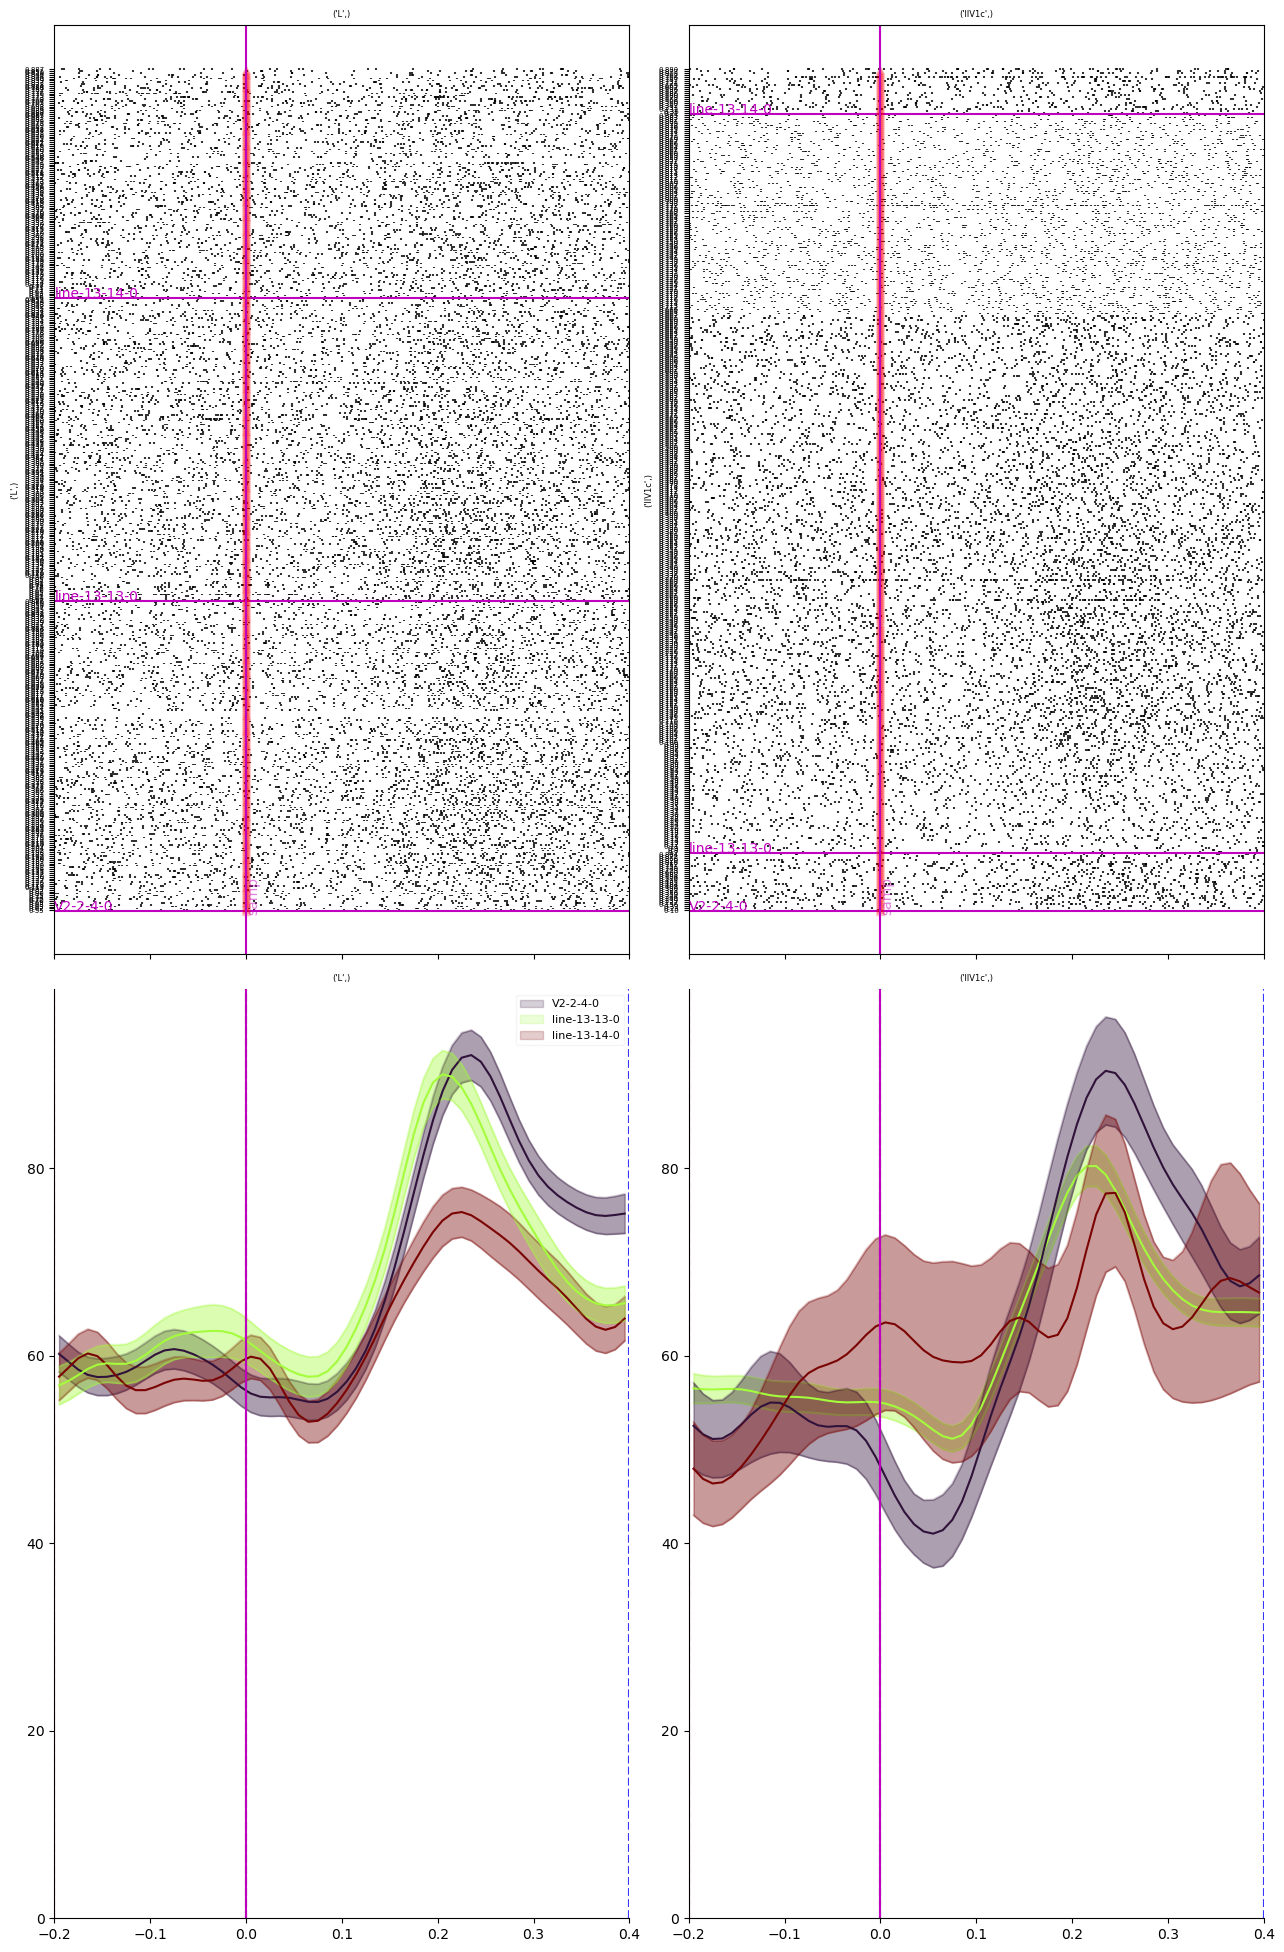

In [47]:
# you can further split data based on conjucntions of another set of variables.

# For example, let's make that same plot, but split subplots by epoch.
SP.datasetbeh_append_column("epoch") # assign epoch to SP
SP.datasetbeh_append_column("seqc_0_shape") # assign epoch to SP
# SP.plotgood_rasters_smfr_each_level_combined(chan, var="event", vars_others=["epoch"]) # plot
event = "03_samp"
SP.plotgood_rasters_smfr_each_level_combined(chan, event=event, var="seqc_0_shape", vars_others=["epoch"]); # plot


In [ ]:
# We can plot the same data, but flipping which variable
SP.plotgood_rasters_smfr_each_level_combined(chan, var="epoch", vars_others=["event"]) # plot


In [ ]:
# You can even use conjucjtions of mltiple variables for splitting suybplots
SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP
SP.datasetbeh_append_column("block", sn.Datasetbeh) # assign epoch to SP

SP.plotgood_rasters_smfr_each_level_combined(chan, var="event", vars_others=["epoch", "block"]) # plot

# Now each subplot is a specific conjucntion of the variables epoch and block.

### Computing modulation of activity by certain variables

For each site, compute how strongly it is modulated by a specific variable, computed 
separatedly for each event.

In [ ]:
# First, append the variables that you wish to analyze
SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP


In [ ]:
if DEBUG:
    # if you debug, then you have small n trials, so lower the threshold for keeping data.
    print(SP.ParamsGlobals)
    SP.globals_update(globals_nmin=2)


In [ ]:
# Run this to compute modulation
var = "seqc_0_shape"
DF_VAR, DF_FR, DF_FR_LEVELS, list_eventwindow_event = SP.modulationgood_compute_wrapper(var, 
                                                                                        DEBUG_CONJUNCTIONS=False, 
                                                                                        THINGS_TO_EXTRACT=["anova"])


In [ ]:
DF_VAR

In [ ]:
# Plot results and save
sdir_base = "/tmp"
SP.modulationgood_plot_WRAPPER(DF_VAR, DF_FR, DF_FR_LEVELS, list_eventwindow_event, 
                               var="epoch", vars_conjuction=["dummy_var"],
                               sdir_base=sdir_base, N_WAYS=1)

### Modulation by time (relative to aligned events)

For each site x event, compute a scalar value indiicating how much its actiivyt is modulated
with respect to this event. This moudlation can be increase in fr, decrease, or any
activity pattern that is consistent across trials.

In [18]:
# Extract modulation, for each site x event

In [ ]:
from neuralmonkey.analyses.event_temporal_modulation_v2 import preprocess_and_extract
from neuralmonkey.analyses.event_temporal_modulation import plot_overview

df_modtime = preprocess_and_extract(SP)


In [ ]:
# Plot overview of modulation

In [ ]:
from neuralmonkey.analyses.event_temporal_modulation_v2 import plot_overview
SAVEDIR = "/tmp"
##################### PLOTS
plot_overview(df_modtime, SP, SAVEDIR)

# Modulation over day (e..g, block switching, or learning, or motivation)

In [48]:
# Collect data from beh dataset
SP.datasetbeh_append_column("datetime")
SP.datasetbeh_append_column("epoch")

# Get scalar firing rates within deisred time winodw (wihtin trial)
SP.DfScalar = SP.datamod_compute_fr_scalar(SP.DfScalar, pre_dur=0.1, post_dur=0.6, fr_which_version="raw")


Updating this column of self.DfScalar with Dataset beh:
datetime
Updating this column of self.DfScalar with Dataset beh:
epoch


In [49]:
# Plot an example site

chan = SP.Sites[10]
event = "03_samp"

In [58]:
chan = SP.sitegetter_map_region_to_sites("FP")[0]

Text(0.5, 1.0, 'chan=321, event=03_samp')

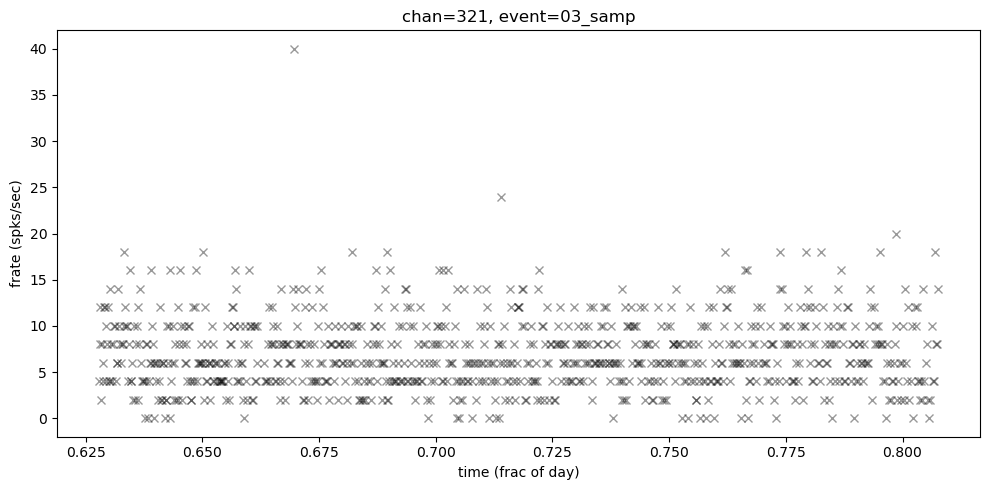

In [59]:
### Extract data for this chan/event
dfthis = SP.dataextract_as_df_good(chan, event_aligned=event)
# Convert from datetime to fraction of 24-hr day
from pythonlib.tools.datetools import standardize_time_helper
times_day = [standardize_time_helper(dt) for dt in dfthis["datetime"]]
frates = dfthis["fr_scalar_raw"].values
# dfthis["trial_neural"]
# dfthis["trialcode"]

### Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(times_day, frates, "xk", alpha=0.4)
ax.set_xlabel("time (frac of day)")
ax.set_ylabel("frate (spks/sec)")
ax.set_title(f"chan={chan}, event={event}")

In [35]:
# Overlay times of when blocks were switched for rules
D = SP.datasetbeh_extract_dataset().copy()
# (NOTE: this si where all features are stored)

# For each trial, score its sequence vs. the ground truth rule.
D.grammarparses_successbinary_score_wrapper()

*** RUNNING D.preprocessGood using these params:
['remove_baseline']
-- Len of D, before applying this param: remove_baseline, ... 872
after: 872
Defined new column: epochset
.. Appended new column 'char_seq', version: task_matlab
Defined new column: epochset
... merge_sets_with_only_single_epoch... 
('llV1c',) only has one epoch!:  ['llV1c']
('L',) only has one epoch!:  ['L']
Mergin these epochset's .. 
[('llV1c',), ('L',)]
Into this new epochset: ('LEFTOVER',)
.. Appended new column 'char_seq', version: task_matlab
Defined new column: epochset
... merge_sets_with_only_single_epoch... 
('llV1c',) only has one epoch!:  ['llV1c']
('L',) only has one epoch!:  ['L']
Mergin these epochset's .. 
[('llV1c',), ('L',)]
Into this new epochset: ('LEFTOVER',)
Assinging to column: self.Dat[taskfeat_cat]
*** RUNNING D.preprocessGood using these params:
['remove_baseline']
-- Len of D, before applying this param: remove_baseline, ... 872
after: 872
trial # 0
trial # 100
trial # 200
trial # 300
trial

Text(0, 0.5, 'epoch_superv')

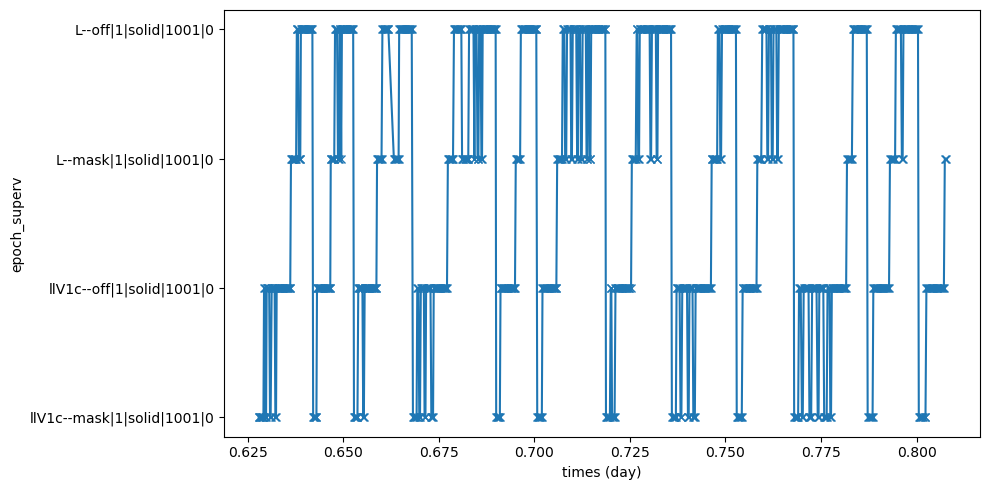

In [65]:
### Code to pull out time vs. value for any feature

# Input feature name
feature_to_plot = "epoch_superv" # rule + supervision mode
# feature_to_plot = "epoch" # rule


rules = D.Dat[feature_to_plot]
if isinstance(rules[0], tuple):
    rules = ["--".join(r) for r in rules]

times = [standardize_time_helper(dt) for dt in D.Dat["datetime"]]

# sort in imcreasing order of time
tmp = [(t, r) for t, r in zip(times, rules)]
tmp = sorted(tmp, key=lambda x: x[0])
times = [x[0] for x in tmp]
rules = [x[1] for x in tmp]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(times, rules, 'x-')
ax.set_xlabel("times (day)")
ax.set_ylabel(feature_to_plot)


In [73]:
# Character is unique to each image
D.Dat["character"].value_counts()

character
neuralbiasdir-36-2-060920    171
neuralbiasdir-36-4-557331    170
neuralbiasdir-36-3-060920    168
neuralbiasdir-36-1-557331    162
neuralbiasdir-36-5-557331    156
neuralbiasdir-36-6-557331     45
Name: count, dtype: int64

In [74]:
# Alternativlry, each image is defined by its (shapes, locations)

# For each trial, what is the image and his behaivor

# The task image
D.Dat["taskconfig_shploc"]



0      ((V2-2-4-0, (0, 0)), (line-13-13-0, (-1, 0)), ...
1      ((V2-2-4-0, (0, 0)), (line-13-13-0, (1, 0)), (...
2      ((V2-2-4-0, (1, 0)), (line-13-13-0, (-1, 0)), ...
3      ((V2-2-4-0, (1, 0)), (line-13-13-0, (0, 0)), (...
4      ((V2-2-4-0, (1, 0)), (line-13-13-0, (0, 0)), (...
                             ...                        
867    ((V2-2-4-0, (0, 0)), (line-13-13-0, (1, 0)), (...
868    ((V2-2-4-0, (1, 0)), (line-13-13-0, (-1, 0)), ...
869    ((V2-2-4-0, (1, 0)), (line-13-13-0, (0, 0)), (...
870    ((V2-2-4-0, (1, 0)), (line-13-13-0, (-1, 0)), ...
871    ((V2-2-4-0, (0, 0)), (line-13-13-0, (-1, 0)), ...
Name: taskconfig_shploc, Length: 872, dtype: object

In [75]:
D.Dat["taskconfig_shploc"].values

taskconfig_shploc
((V2-2-4-0, (0, 0)), (line-13-13-0, (-1, 0)), (line-13-14-0, (1, 0)))    171
((V2-2-4-0, (1, 0)), (line-13-13-0, (0, 0)), (line-13-14-0, (-1, 0)))    170
((V2-2-4-0, (0, 0)), (line-13-13-0, (1, 0)), (line-13-14-0, (-1, 0)))    168
((V2-2-4-0, (1, 0)), (line-13-13-0, (-1, 0)), (line-13-14-0, (0, 0)))    162
((V2-2-4-0, (-1, 0)), (line-13-13-0, (0, 0)), (line-13-14-0, (1, 0)))    156
((V2-2-4-0, (-1, 0)), (line-13-13-0, (1, 0)), (line-13-14-0, (0, 0)))     45
Name: count, dtype: int64

In [76]:
# The behavior
D.sequence_extract_shapes_drawn()

In [77]:
# The shapes drawn on each trial, in order
D.Dat["shapes_drawn"]

0      (line-13-13-0, line-13-14-0, V2-2-4-0)
1      (line-13-13-0, line-13-14-0, V2-2-4-0)
2      (line-13-13-0, line-13-14-0, V2-2-4-0)
3                                 (V2-2-4-0,)
4                             (line-13-13-0,)
                        ...                  
867    (line-13-13-0, line-13-14-0, V2-2-4-0)
868                               (V2-2-4-0,)
869    (line-13-13-0, line-13-14-0, V2-2-4-0)
870    (V2-2-4-0, line-13-14-0, line-13-13-0)
871    (line-13-14-0, V2-2-4-0, line-13-13-0)
Name: shapes_drawn, Length: 872, dtype: object

In [78]:
# The locations draw on each trial, in order
D.Dat["locs_drawn"]

0      ((-1, 0), (1, 0), (0, 0))
1      ((1, 0), (-1, 0), (0, 0))
2      ((-1, 0), (0, 0), (1, 0))
3                      ((1, 0),)
4                      ((0, 0),)
                 ...            
867    ((1, 0), (-1, 0), (0, 0))
868                    ((1, 0),)
869    ((0, 0), (-1, 0), (1, 0))
870    ((1, 0), (0, 0), (-1, 0))
871    ((1, 0), (0, 0), (-1, 0))
Name: locs_drawn, Length: 872, dtype: object

In [79]:
# Did he succeed?
D.Dat["success_binary_quick"]
# Makke sure to run this first: D.grammarparses_successbinary_score_wrapper()

0       True
1       True
2       True
3      False
4      False
       ...  
867     True
868    False
869     True
870     True
871     True
Name: success_binary_quick, Length: 872, dtype: bool

In [91]:
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(D.Dat, ["epoch", "aborted", "success_binary_quick"])


('L', False, True) :     346
('L', True, False) :     105
('llV1c', False, True) :     322
('llV1c', True, False) :     99


{('L', False, True): 346,
 ('L', True, False): 105,
 ('llV1c', False, True): 322,
 ('llV1c', True, False): 99}

In [93]:
# Probe means this trial allowed him to do whatever, to test generalization (so no aborts).
# i.e. only has to draw accurate image, dont care about sequence.
D.Dat["probe"].value_counts()

probe
0    872
Name: count, dtype: int64

----- CLC for This rule:  ss-rank-llV1c
--- Chunk num: 0
Name: None
Index: None
Chunks: [[0], [1], [2]]
Hier: [[1], [0], [2]]
Fixed Order: {0: True, 1: [False, False, False]}
list labels/shapes: [['line-13-14-0', {'x': -1.7, 'y': 0.05, 'sx': None, 'sy': None, 'theta': None, 'order': None}], ['line-13-13-0', {'x': 0.05, 'y': 0.05, 'sx': None, 'sy': None, 'theta': None, 'order': None}], ['V2-2-4-0', {'x': 1.8, 'y': 0.05, 'sx': None, 'sy': None, 'theta': None, 'order': None}]]
colorlist_hier: None
None
... with these parases:
[(1, 0, 2)]


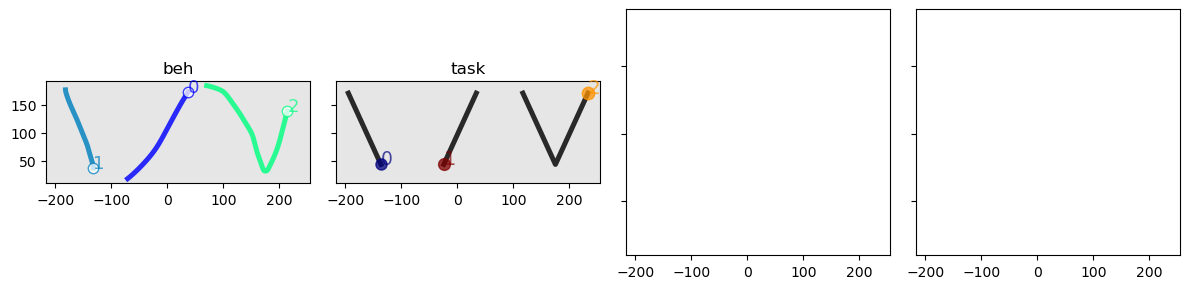

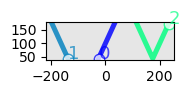

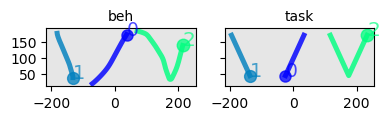

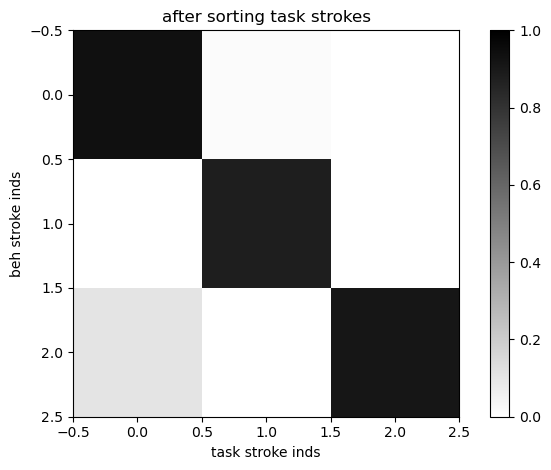

In [80]:
# Plot an exmaple trial
D.grammarparses_grammardict_return(100, doplot=True)

In [81]:
# For all of these, we can put them back in to SP
SP.datasetbeh_append_column_mult(["epoch", "shapes_drawn", "success_binary_quick", "locs_drawn", "taskconfig_shploc"], Dataset=D)

 ** slice_by_row_label
Appending thse columns...  ['locs_drawn', 'success_binary_quick', 'taskconfig_shploc', 'shapes_drawn']


In [82]:
# Now SP wil lhave all those features
SP.DfScalar

,trialcode,chan,event_unique_name,event_aligned,spike_times,trial_neural,event_time,idx_trialtime,event_idx_within_trial,fr_sm,...,session_idx,session_neural,epoch,datetime,seqc_0_shape,fr_scalar_raw,locs_drawn,success_binary_quick,taskconfig_shploc,shapes_drawn
0,221031-1-8,1,03_samp,03_samp,"[-0.09265029058070695, -0.013966130580705283, ...",7,3.322878,0,0,"[[15.945020112326985, 12.336674187180995, 8.48...",...,0,0,llV1c,221031-150406,line-13-13-0,8.0,"((-1, 0), (1, 0), (0, 0))",True,"((V2-2-4-0, (0, 0)), (line-13-13-0, (-1, 0)), ...","(line-13-13-0, line-13-14-0, V2-2-4-0)"
1,221031-1-8,2,03_samp,03_samp,"[-0.10997637058071064, -0.09265029058070695, 0...",7,3.322878,0,0,"[[23.988911504832284, 15.132212279046374, 9.22...",...,0,0,llV1c,221031-150406,line-13-13-0,2.0,"((-1, 0), (1, 0), (0, 0))",True,"((V2-2-4-0, (0, 0)), (line-13-13-0, (-1, 0)), ...","(line-13-13-0, line-13-14-0, V2-2-4-0)"
2,221031-1-8,3,03_samp,03_samp,"[-0.1310298105807064, -0.09269125058070671, -0...",7,3.322878,0,0,"[[2.318031492985826, 2.9968063386103374, 5.171...",...,0,0,llV1c,221031-150406,line-13-13-0,8.0,"((-1, 0), (1, 0), (0, 0))",True,"((V2-2-4-0, (0, 0)), (line-13-13-0, (-1, 0)), ...","(line-13-13-0, line-13-14-0, V2-2-4-0)"
3,221031-1-8,4,03_samp,03_samp,"[-0.12754821058070576, -0.022321970580705397, ...",7,3.322878,0,0,"[[17.515249384655316, 12.284689449793703, 9.90...",...,0,0,llV1c,221031-150406,line-13-13-0,16.0,"((-1, 0), (1, 0), (0, 0))",True,"((V2-2-4-0, (0, 0)), (line-13-13-0, (-1, 0)), ...","(line-13-13-0, line-13-14-0, V2-2-4-0)"
4,221031-1-8,5,03_samp,03_samp,"[-0.16473989058070515, -0.09269125058070671, -...",7,3.322878,0,0,"[[13.176087440555845, 15.335537359536284, 16.2...",...,0,0,llV1c,221031-150406,line-13-13-0,16.0,"((-1, 0), (1, 0), (0, 0))",True,"((V2-2-4-0, (0, 0)), (line-13-13-0, (-1, 0)), ...","(line-13-13-0, line-13-14-0, V2-2-4-0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401987,221031-1-888,506,03_samp,03_samp,"[-0.18605615210526594, -0.1398942321038703, -0...",887,3.736792,871,0,"[[51.12276951399749, 49.957062236307706, 51.42...",...,0,0,L,221031-192257,line-13-14-0,24.0,"((1, 0), (0, 0), (-1, 0))",True,"((V2-2-4-0, (0, 0)), (line-13-13-0, (-1, 0)), ...","(line-13-14-0, V2-2-4-0, line-13-13-0)"
401988,221031-1-888,508,03_samp,03_samp,"[-0.1902340721053406, 0.0710497678946922, 0.29...",887,3.736792,871,0,"[[23.395628839577764, 18.454319379772862, 13.4...",...,0,0,L,221031-192257,line-13-14-0,4.0,"((1, 0), (0, 0), (-1, 0))",True,"((V2-2-4-0, (0, 0)), (line-13-13-0, (-1, 0)), ...","(line-13-14-0, V2-2-4-0, line-13-13-0)"
401989,221031-1-888,509,03_samp,03_samp,"[-0.0075934321039312636, 0.04930000789590849, ...",887,3.736792,871,0,"[[1.1135559194637268, 0.42563219160346016, 0.1...",...,0,0,L,221031-192257,line-13-14-0,4.0,"((1, 0), (0, 0), (-1, 0))",True,"((V2-2-4-0, (0, 0)), (line-13-13-0, (-1, 0)), ...","(line-13-14-0, V2-2-4-0, line-13-13-0)"
401990,221031-1-888,510,03_samp,03_samp,"[-0.18331183210375457, -0.058957272104635194, ...",887,3.736792,871,0,"[[24.1342554585439, 21.270360914932244, 17.474...",...,0,0,L,221031-192257,line-13-14-0,8.0,"((1, 0), (0, 0), (-1, 0))",True,"((V2-2-4-0, (0, 0)), (line-13-13-0, (-1, 0)), ...","(line-13-14-0, V2-2-4-0, line-13-13-0)"


In [ ]:
# There exist some images/characters, that have the same nbehavior across the two rules
# TODO: pull those out.

In [ ]:
# TODO: overlay the rule switching on top of the fr
